In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# test = pd.read_csv('test.csv')
# test.head()

In [48]:
print(df.shape)
# print(test.shape)

(54808, 14)


In [49]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [50]:
df['employee_id'].nunique()

54808

In [6]:
# test.isnull().sum()

In [51]:
df.drop('employee_id',axis=1,inplace=True)
# test.drop('employee_id',axis=1,inplace=True)

In [53]:
df["previous_year_rating"] = df["previous_year_rating"].fillna(0)
# test["previous_year_rating"] = test["previous_year_rating"].fillna(0)

In [54]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
# test.isnull().sum()

In [14]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [55]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [56]:
df['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [57]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [59]:
df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

### EDA

#### Region countplot based on is_promoted

In [61]:
d1 = df.groupby(['region','is_promoted'])['is_promoted'].sum()
d1

region     is_promoted
region_1   0                0
           1               58
region_10  0                0
           1               51
region_11  0                0
                         ... 
region_7   1              516
region_8   0                0
           1               53
region_9   0                0
           1                8
Name: is_promoted, Length: 68, dtype: int64

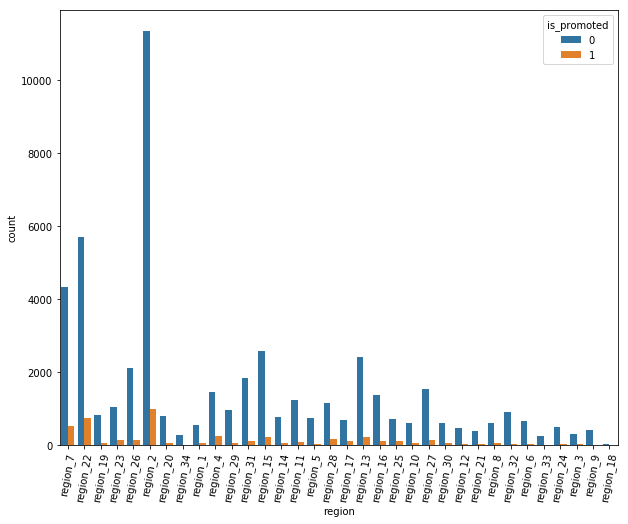

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(df['region'],hue=df['is_promoted'])
plt.xticks(rotation=80)
plt.show()

#### Department Countplot based on is_promoted

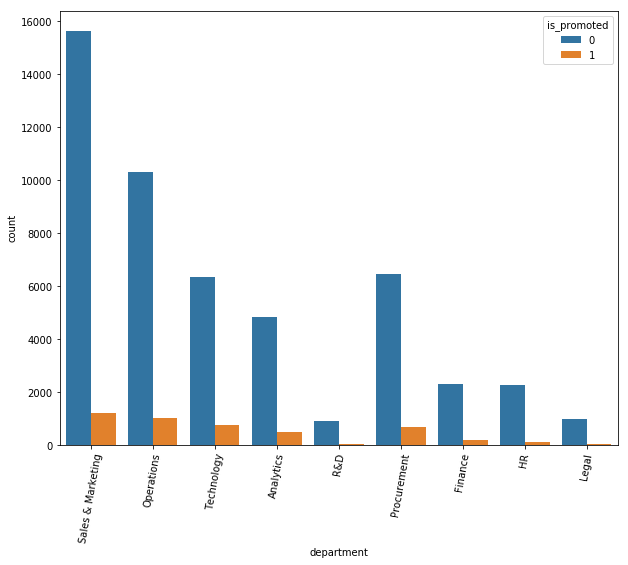

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(df['department'],hue=df['is_promoted'])
plt.xticks(rotation=80)
plt.show()

#### Education countplot based on is_promoted 

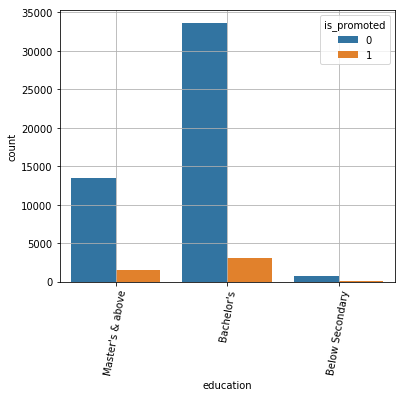

In [69]:
plt.figure(figsize=(6,5))
sns.countplot(df['education'],hue=df['is_promoted'])
plt.xticks(rotation=80)
plt.grid()
plt.show()

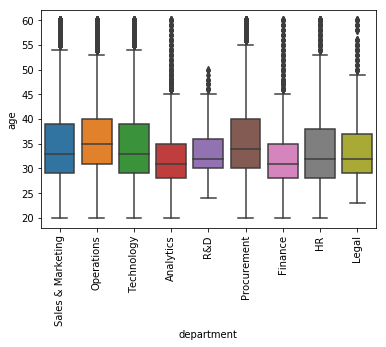

In [67]:
sns.boxplot(df['department'],df['age'])
plt.xticks(rotation=90)
plt.show()

### Classification

In [70]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [71]:
df.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.064119,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.177935,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.064119,0.177935,1.000000,0.191163,0.274593,0.021475,0.058718,0.125991
length_of_service,-0.057275,0.657111,0.191163,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.045576,-0.025592,0.274593,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.007628,-0.008169,0.021475,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.058718,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.125991,-0.010670,0.221582,0.195871,0.181147,1.000000


In [73]:
x = df.iloc[:,[7,9,10,11]]
y = df.iloc[:,-1]
x.head()

,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,5.0,1,0,49
1,5.0,0,0,60
2,3.0,0,0,50
3,1.0,0,0,50
4,3.0,0,0,73


In [74]:
print(x.shape)
print(y.shape)

(54808, 4)
(54808,)


In [75]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(41106, 4)
(13702, 4)
(41106,)
(13702,)


#### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [83]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)

LogisticRegression()

In [84]:
print(m1.score(x_train,y_train))
print(m1.score(x_test,y_test))

0.9168977764803192
0.9122755802072691


In [85]:
log_pred =  m1.predict(x_test)
log_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [87]:
confusion_matrix(y_test,log_pred)

array([[12438,    50],
       [ 1152,    62]], dtype=int64)

In [88]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     12488
           1       0.55      0.05      0.09      1214

    accuracy                           0.91     13702
   macro avg       0.73      0.52      0.52     13702
weighted avg       0.88      0.91      0.88     13702



In [89]:
accuracy_score(y_test,log_pred)

0.9122755802072691

#### Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
m2 = DecisionTreeClassifier() # criterion='entropy/gini', max_depth
m2.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
print(m2.score(x_train,y_train))
print(m2.score(x_test,y_test))

0.9285505765581666
0.921690264195008


In [94]:
dt_pred =  m2.predict(x_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
confusion_matrix(y_test,dt_pred)

array([[12442,    46],
       [ 1027,   187]], dtype=int64)

In [96]:
accuracy_score(y_test,dt_pred)

0.921690264195008

In [97]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12488
           1       0.80      0.15      0.26      1214

    accuracy                           0.92     13702
   macro avg       0.86      0.58      0.61     13702
weighted avg       0.91      0.92      0.90     13702



#### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
m3 = RandomForestClassifier() # n_estimators, criterion='gini/entropy', max_depth 
m3.fit(x_train,y_train)

RandomForestClassifier()

In [122]:
print(m3.score(x_train,y_train))
print(m3.score(x_test,y_test))

0.9285505765581666
0.9219092103342578


In [123]:
rf_pred = m3.predict(x_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
confusion_matrix(y_test,rf_pred)

array([[12435,    53],
       [ 1017,   197]], dtype=int64)

In [125]:
accuracy_score(y_test,rf_pred)

0.9219092103342578

In [126]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12488
           1       0.79      0.16      0.27      1214

    accuracy                           0.92     13702
   macro avg       0.86      0.58      0.61     13702
weighted avg       0.91      0.92      0.90     13702



#### K-NN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
m4 = KNeighborsClassifier()
m4.fit(x_train,y_train)

KNeighborsClassifier()

In [129]:
print(m4.score(x_train,y_train))
print(m4.score(x_test,y_test))

0.9071181822604972
0.8973142606918698


In [130]:
knn_pred = m4.predict(x_test)
knn_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [131]:
confusion_matrix(y_test,knn_pred)

array([[12054,   434],
       [  973,   241]], dtype=int64)

In [132]:
accuracy_score(y_test,knn_pred)

0.8973142606918698

In [133]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.94     12488
           1       0.36      0.20      0.26      1214

    accuracy                           0.90     13702
   macro avg       0.64      0.58      0.60     13702
weighted avg       0.87      0.90      0.88     13702



In [135]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
#### Removing Null values

In [139]:
df.shape

(54808, 13)

In [138]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [136]:
df['education'].sample(50)

49431                 NaN
38527          Bachelor's
37116          Bachelor's
42995    Master's & above
47694          Bachelor's
5514           Bachelor's
47204          Bachelor's
54675    Master's & above
36145     Below Secondary
9995     Master's & above
37748          Bachelor's
31376          Bachelor's
49121          Bachelor's
49965          Bachelor's
848            Bachelor's
35907    Master's & above
27952          Bachelor's
54668          Bachelor's
18838          Bachelor's
6576           Bachelor's
42420          Bachelor's
38065          Bachelor's
11572          Bachelor's
15847          Bachelor's
20962                 NaN
37075          Bachelor's
43287          Bachelor's
1113           Bachelor's
14909          Bachelor's
1598           Bachelor's
43054    Master's & above
46193          Bachelor's
43539     Below Secondary
25440          Bachelor's
49553          Bachelor's
14477          Bachelor's
33189    Master's & above
5090           Bachelor's
40190    Mas

In [137]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [140]:
df['education'].fillna("Bachelor's",inplace=True)
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Label Encodng Categorical Features

In [146]:
df.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [148]:
print(df['department'].nunique())
print(df['region'].nunique())
print(df['education'].nunique())
print(df['gender'].nunique())
print(df['recruitment_channel'].nunique())

9
34
3
2
3


In [149]:
df.columns
# include - department, region,education,gender, recruitment_channel, 

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [151]:
# df.corr()
# exclude - no_of_training,age,length_of_service

In [153]:
from sklearn.preprocessing import LabelEncoder

In [154]:
lb = LabelEncoder()
df['department'] = lb.fit_transform(df['department'])
df['region'] = lb.fit_transform(df['region'])
df['education'] = lb.fit_transform(df['education'])
df['gender'] = lb.fit_transform(df['gender'])
df['recruitment_channel'] = lb.fit_transform(df['recruitment_channel'])

In [157]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [158]:
df.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,-0.020592,0.043441,-0.030108,0.004732,0.014152,0.079162,-0.100340,0.059060,-0.088209,-0.002151,-0.251626,0.000130
region,-0.020592,1.000000,-0.003815,0.019730,-0.000920,-0.004590,-0.088918,-0.013465,-0.058939,-0.007664,0.000307,0.023572,0.008841
education,0.043441,-0.003815,1.000000,-0.032368,-0.003564,-0.033469,0.339966,0.092379,0.233666,0.012123,-0.001409,0.032787,0.029257
gender,-0.030108,0.019730,-0.032368,1.000000,0.006567,0.084501,-0.016293,-0.025053,-0.019675,-0.037400,0.002381,-0.024494,-0.011109
recruitment_channel,0.004732,-0.000920,-0.003564,0.006567,1.000000,-0.010405,-0.011400,0.003506,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,0.014152,-0.004590,-0.033469,0.084501,-0.010405,1.000000,-0.081278,-0.064119,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.079162,-0.088918,0.339966,-0.016293,-0.011400,-0.081278,1.000000,0.177935,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.100340,-0.013465,0.092379,-0.025053,0.003506,-0.064119,0.177935,1.000000,0.191163,0.274593,0.021475,0.058718,0.125991
length_of_service,0.059060,-0.058939,0.233666,-0.019675,-0.002887,-0.057275,0.657111,0.191163,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.088209,-0.007664,0.012123,-0.037400,-0.000297,-0.045576,-0.025592,0.274593,-0.077693,1.000000,0.097000,0.078391,0.221582


In [159]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [162]:
# Features to include- 
# department, region, education, recruitment_channel,previous_year_rating, 
# KPI's met, awards won, avg_training_score
x1 = df.iloc[:,[0,1,2,4,7,9,10,11]]
y1 = df.iloc[:,-1]
print(x1.shape)
print(y1.shape)

(54808, 8)
(54808,)


In [163]:
x1.head()

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,2,5.0,1,0,49
1,4,14,0,0,5.0,0,0,60
2,7,10,0,2,3.0,0,0,50
3,7,15,0,0,1.0,0,0,50
4,8,18,0,0,3.0,0,0,73


### Applying Logistic Regression

In [164]:
log_m1 = LogisticRegression()
log_m1.fit(x1,y1)

E:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [165]:
log_m1.score(x1,y1)

0.9156327543424317

#### Applying Decision Tree

In [166]:
dt_m2 = DecisionTreeClassifier()
dt_m2.fit(x1,y1)

DecisionTreeClassifier()

In [167]:
dt_m2.score(x1,y1)

0.972011385199241

#### Applying RandomForest

In [168]:
rf_m3 = RandomForestClassifier()
rf_m3.fit(x1,y1)

RandomForestClassifier()

In [169]:
rf_m3.score(x1,y1)

0.972011385199241

#### Applying KNN

In [170]:
knn_m4 = KNeighborsClassifier()
knn_m4.fit(x1,y1)

KNeighborsClassifier()

In [171]:
knn_m4.score(x1,y1)

0.9380564881039264

#### Saving the model

In [173]:
# pip install joblib - if not installed 
import joblib

In [174]:
fname = 'rf_model.sav'
joblib.dump(rf_m3,fname)

['rf_model.sav']

In [175]:
saved_model = open('rf_model.sav','rb')
model = joblib.load(saved_model)

In [201]:
x_test = pd.read_csv('test.csv')
x_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [202]:
x_test.shape

(23490, 13)

In [203]:
x_test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [204]:
x_test['employee_id'].nunique()

23490

In [205]:
x_test.drop(['employee_id'],axis=1,inplace=True)
x_test.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


In [206]:
x_test.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [207]:
x_test['education'].value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [208]:
x_test['education'].fillna("Bachelor's",inplace=True)
x_test.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [209]:
x_test['previous_year_rating'].fillna(x_test['previous_year_rating'].mean(), inplace=True)
x_test.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [210]:
from sklearn.preprocessing import LabelEncoder

In [211]:
x_test.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [212]:
lb = LabelEncoder()
x_test['department'] = lb.fit_transform(x_test['department'])
x_test['region'] = lb.fit_transform(x_test['region'])
x_test['education'] = lb.fit_transform(x_test['education'])
x_test['gender'] = lb.fit_transform(x_test['gender'])
x_test['recruitment_channel'] = lb.fit_transform(x_test['recruitment_channel'])

In [213]:
x_test.dtypes

department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [214]:
# Features to include- 
# department, region, education, recruitment_channel,previous_year_rating, 
# KPI's met, awards won, avg_training_score
# x1 = df.iloc[:,[0,1,2,4,7,9,10,11]]


In [215]:
x_test = x_test.iloc[:,[0,1,2,4,7,9,10,11]]
x_test.head()

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,2,3.339146,1,0,77
1,2,28,0,0,3.000000,0,0,51
2,7,4,0,0,1.000000,0,0,47
3,5,11,0,0,2.000000,0,0,65
4,1,21,0,2,4.000000,0,0,61


In [216]:
x_test['is_promoted'] = model.predict(x_test)
x_test

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8,18,0,2,3.339146,1,0,77,0
1,2,28,0,0,3.000000,0,0,51,0
2,7,4,0,0,1.000000,0,0,47,0
3,5,11,0,0,2.000000,0,0,65,0
4,1,21,0,2,4.000000,0,0,61,0
...,...,...,...,...,...,...,...,...,...
23485,3,11,1,2,3.000000,0,0,61,0
23486,8,17,0,2,3.000000,0,0,74,0
23487,2,7,0,2,4.000000,0,0,50,0
23488,5,24,0,2,3.339146,0,0,70,0


In [217]:
x_test['is_promoted'].value_counts()

0    22316
1     1174
Name: is_promoted, dtype: int64